In [1]:
# %load run_py21cmfast.py
import numpy as np, os
import matplotlib.pyplot as plt
import py21cmfast as p21c
import h5py, pickle, yaml
from tqdm import tqdm
from scipy.stats import binned_statistic_dd

import astropy.units as u

In [2]:
a_params = {'HII_EFF_FACTOR':80.663, 'R_BUBBLE_MAX':21.772, 'ION_Tvir_MIN':4.823}
params = {'HII_DIM':200, 'DIM':600, 'BOX_LEN':300}
c_params = {'OMm':(0.02242 + 0.11933)/0.6766**2, 'OMb':0.02242/0.6766**2, 'SIGMA_8':0.8102, 'POWER_INDEX':0.9665}

rseed = 12222219
z_min, z_max = 7.000, 11.000

In [6]:
path_cache = '/scratch/snx3000/mibianco/_cache/'

if not (os.path.exists(path_cache)):
    os.makedirs(path_cache)
else:
    os.system('rm %s*h5' %path_cache)

p21c.config['direc'] = path_cache

rm: cannot remove '/scratch/snx3000/mibianco/_cache/*h5': No such file or directory


In [18]:
initial_conditions = p21c.initial_conditions(user_params=params, cosmo_params=c_params, random_seed=rseed)

# flag options
flag_options = p21c.FlagOptions(USE_HALO_FIELD=False, HALO_STOCHASTICITY=True, USE_MASS_DEPENDENT_ZETA=False, USE_MINI_HALOS=False, INHOMO_RECO=True, 
                                USE_UPPER_STELLAR_TURNOVER=False, USE_EXP_FILTER=True, CELL_RECOMB=True)

lc = p21c.run_lightcone(redshift=5., init_box=initial_conditions, flag_options=flag_options, astro_params=a_params, 
                        lightcone_quantities=('xH_box', 'density', 'brightness_temp'), 
                        regenerate=False, random_seed=rseed, direc=path_cache)

You are setting R_BUBBLE_MAX != 50 when INHOMO_RECO=True. This is non-standard (but allowed), and usually occurs upon manual update of INHOMO_RECO
USE_EXP_FILTER has no effect unless USE_HALO_FIELD is true


ValueError: Use of `bounds` is incompatible with 'method=Brent'.

In [4]:
path_in = '/users/mibianco/codes/test_sdc3b/'

path_out = params['Output']['inputs_basename']

if not (os.path.exists(path_out)):
    print('---> Created directory: %s' %path_out)
    os.makedirs(path_out)
    os.makedirs(path_out+'grids/')
    os.makedirs(path_out+'sources/')
    os.makedirs(path_out+'result_21cmFAST/')
    os.makedirs(path_out+'img/') 
else:
    print('---> Directory already exist: %s' %path_out)

---> Created directory: /scratch/snx3000/mibianco/sdc3b/run_256Mpc_256_1e10/


In [5]:
# user_paramser, cosmology and astrophysical parameters
cosmo_params = p21c.CosmoParams(OMb=Ob0, OMm=Om0, hlittle=h)
user_params = p21c.UserParams(HII_DIM=meshsize, BOX_LEN=boxsize, DIM=meshsize*3, USE_INTERPOLATION_TABLES=True, N_THREADS=24, HMF=1, SAMPLER_MIN_MASS=min_mhalo, SAMPLER_BUFFER_FACTOR=1.2, AVG_BELOW_SAMPLER=False)
astro_params = p21c.AstroParams(HII_EFF_FACTOR=1, M_TURN=mturn, R_BUBBLE_MAX=R_max_cMpc, F_ESC10=f0_esc, ALPHA_ESC=alph_esc, F_STAR10=f_star10, ALPHA_STAR=alph_star, 
                                t_STAR=t_star, SIGMA_STAR=0.0)

vol_cell = (user_params.BOX_LEN / user_params.HII_DIM * u.Mpc)**3

# flag options
flag_options = p21c.FlagOptions(USE_HALO_FIELD=True, HALO_STOCHASTICITY=True, USE_MASS_DEPENDENT_ZETA=True, USE_MINI_HALOS=False, INHOMO_RECO=True, 
                                USE_UPPER_STELLAR_TURNOVER=False, USE_EXP_FILTER=True, CELL_RECOMB=True)

# Save parameters to a file
with open('%scosmo_par.pkl' %path_out, 'wb') as file:
    pickle.dump(cosmo_params.defining_dict, file)

# Save parameters to a file
with open('%sastro_par.pkl' %path_out, 'wb') as file:
    pickle.dump(astro_params.defining_dict, file)

with open('%suser_par.pkl' %path_out, 'wb') as file:
    pickle.dump(user_params.defining_dict, file)

with open('%sflag_opt.pkl' %path_out, 'wb') as file:
    pickle.dump(flag_options.defining_dict, file)

# change the cache path
random_seed = 918
path_cache = '/scratch/snx3000/mibianco/21cmFAST-cache/'
p21c.config['direc'] = path_cache

# Results are better for the halo finder using the top-hat filter for reionisation
p21c.global_params.HII_FILTER = 0

# set clumping factor
p21c.global_params.CLUMPING_FACTOR = clumping

# set ionizing photons per baryons
p21c.global_params.Pop2_ion = Nion

/project/c31/codes/miniconda3/envs/karabo-env/lib/python3.9/site-packages/py21cmfast/inputs.py:937: UserWarning: CELL_RECOMB is automatically set to True if USE_EXP_FILTER is True.
  warnings.warn(


In [6]:
%%time
#create the initial conditions
initial_conditions = p21c.initial_conditions(user_params=user_params, cosmo_params=cosmo_params, random_seed=random_seed)

lc = p21c.run_lightcone(redshift=5., init_box=initial_conditions, flag_options=flag_options, astro_params=astro_params, 
                        lightcone_quantities=('xH_box', 'density', 'brightness_temp'), 
                        regenerate=False, random_seed=random_seed, direc=path_cache)

CPU times: user 5h 25min 38s, sys: 4min 8s, total: 5h 29min 47s
Wall time: 1h 1min 35s


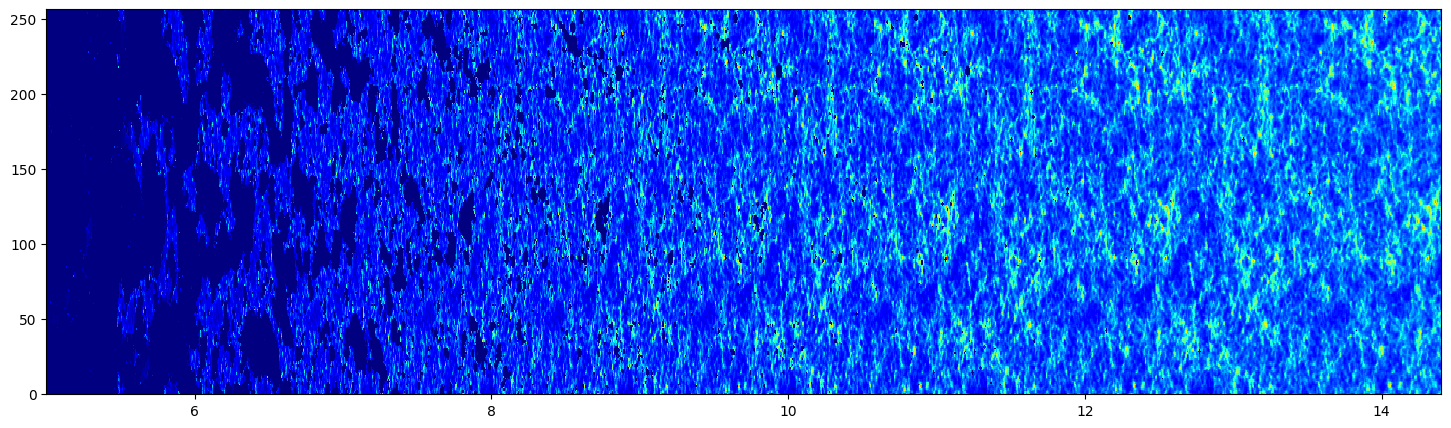

In [11]:
plt.figure(figsize=(18, 5))
plt.pcolormesh(lc.lightcone_redshifts, np.linspace(0, 256, 256), lc.brightness_temp[32], cmap='jet')
plt.xlim(5, 14.4)
plt.savefig(path_out+'img/slice_21cmfast.png', bbox_inches='tight')

In [12]:
lc.lightcone_redshifts

array([ 5.00000001,  5.00186125,  5.00372335, ..., 34.95768139,
       34.98496552, 35.01228089])

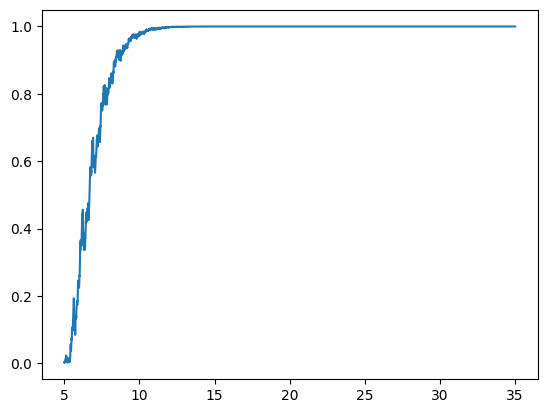

In [13]:
plt.plot(lc.lightcone_redshifts, lc.xH_box.mean(axis=(0,1)))

In [14]:
redshifts = []
nr_halo_arr = []

for i in tqdm(range(lc.global_xH.size)):
    # get redshift of the chace
    z = lc.cache_files['ionized_box'][i][0]

    with h5py.File(lc.cache_files['halobox'][i][1]) as f:
        n_ion = f['HaloBox']['n_ion'][:]
    #np.save('%ssources/nion_z%.3f.npy' %(path_out, z), n_ion)

    # number of halos
    nr_halo = np.count_nonzero(n_ion)
    nr_halo_arr.append(nr_halo)
    
    # save number of ionizing photons for pyC2Ray
    if(nr_halo != 0):
        # redshift of the sources
        redshifts.append(z)

        # store only indexes and Nion
        ii, jj, kk = np.nonzero(n_ion)
        Nion = n_ion[ii, jj, kk]

        np.savetxt('%ssources/src_z%.3f.txt' %(path_out, z), np.array([ii, jj, kk, Nion]).T, fmt='%d\t%d\t%d\t%.2f', header='i\tj\tk\tn_ion = Mstar/Vcell*Nion*fesc [Msun/Mpc^3]')
    else:
        pass

    # access the chace file
    with h5py.File(lc.cache_files['pt_halos'][i][1]) as f:
        halo_mass = f['PerturbHaloField']['halo_masses'][:]
        halo_pos = f['PerturbHaloField']['halo_coords'][:]
        #nr_halo = halo_mass.size
        
    # save number of ionizing photons for pyC2Ray
    if(nr_halo > 0): 
        np.savetxt('%ssources/halo_z%.3f.txt' %(path_out, z), np.hstack((halo_pos, halo_mass[..., None])), fmt='%d\t%d\t%d\t%.2f', header='i\tj\tk\thalo mass [Msun]')
    else:
        pass

    # save Overdensity field
    with h5py.File(lc.cache_files['perturb_field'][i][1]) as f:
        overdens = f['PerturbedField']['density'][:].astype('float64')

    np.save('%sgrids/ovrdens_z%.3f.npy' %(path_out, z), overdens)

    # save Ionization field
    with h5py.File(lc.cache_files['ionized_box'][i][1]) as f:
        xHI = f['IonizedBox']['xH_box'][:]
    np.save('%sresult_21cmFAST/xHI_z%.3f.npy' %(path_out, z), xHI)
    
# store redshift 
all_redshifts = np.array([lc.cache_files['ionized_box'][i][0] for i in range(len(lc.cache_files['halobox']))])
redshifts = np.array(redshifts) #all_redshifts.copy()
nr_halo_arr = np.array(nr_halo_arr)
np.savetxt('%sall_redshifts.txt' %path_out, all_redshifts, fmt='%.3f')
np.savetxt('%sredshifts.txt' %path_out, redshifts, fmt='%.3f')
np.savetxt('%sglob_xHI.txt' %path_out, np.array([all_redshifts, lc.global_xH]).T, fmt='%.3f\t%.5e')

100%|██████████| 92/92 [01:51<00:00,  1.22s/it]


In [16]:
redshifts

array([31.29722134, 30.66394308, 30.04308204, 29.43439472, 28.83764244,
       28.25259118, 27.67901149, 27.11667846, 26.56537155, 26.02487458,
       25.49497557, 24.97546673, 24.46614433, 23.96680864, 23.47726383,
       22.99731793, 22.52678272, 22.06547369, 21.61320992, 21.16981406,
       20.73511223, 20.30893396, 19.89111211, 19.48148285, 19.07988552,
       18.68616264, 18.30015981, 17.92172566, 17.55071178, 17.18697267,
       16.8303657 , 16.48075101, 16.13799151, 15.80195277, 15.47250303,
       15.14951308, 14.83285625, 14.52240838, 14.21804772, 13.9196549 ,
       13.62711292, 13.34030706, 13.05912483, 12.78345597, 12.51319238,
       12.24822807, 11.98845914, 11.73378371, 11.48410191, 11.23931582,
       10.99932946, 10.76404871, 10.53338131, 10.30723679, 10.08552647,
        9.86816341,  9.65506236,  9.44613977,  9.24131369,  9.0405038 ,
        8.84363137,  8.65061917,  8.46139152,  8.27587421,  8.09399449,
        7.91568104,  7.74086393,  7.5694746 ,  7.40144584,  7.23

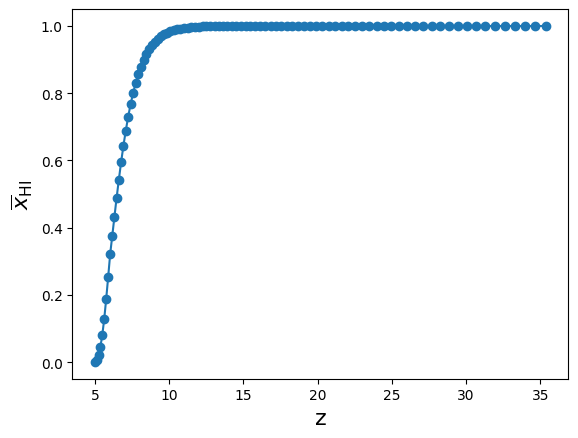

(None, None)

<Figure size 640x480 with 0 Axes>

In [18]:
plt.plot(all_redshifts, lc.global_xH, 'o-')
plt.xlabel('z', size=16), plt.ylabel(r'$\overline{x}_{\rm HI}$', size=16)
#plt.xlim(5, 20)
plt.savefig(path_out+'img/lc_21cmfast.png', bbox_inches='tight')
plt.show(), plt.clf()

In [10]:
for i in tqdm(range(lc.global_xH.size-1)):
    # get redshift of the chace
    z = lc.cache_files['ionized_box'][i][0]

    #if not os.path.exists('%sresult_21cmFAST/xHI_z%.3f.npy' %(path_out, z)):

    with h5py.File(lc.cache_files['halobox'][i+1][1]) as f:
        n_ion_f = f['HaloBox']['n_ion'][:]
    with h5py.File(lc.cache_files['halobox'][i][1]) as f:
        n_ion_i = f['HaloBox']['n_ion'][:]
        
    n_ion_diff = n_ion_f - n_ion_i
    print(z, np.count_nonzero(n_ion_diff < 0))

 23%|██▎       | 21/91 [00:00<00:00, 101.80it/s]

35.371912840518874 0
34.65873874574053 0
33.95954844366764 0
33.27406774254275 0
32.60202782691232 0
31.943165152209147 0
31.297221341401723 0
30.663943083670105 0
30.043082035068537 0
29.43439472113583 0
28.83764244141539 0
28.252591175847343 0
27.679011492996153 0
27.116678460077683 0
26.565371554750413 0
26.024874578636265 0
25.49497557253708 0
24.975466733313517 0
24.466144332393796 0
23.966808635880273 0
23.47726382622258 0
22.997317925426564 0


 47%|████▋     | 43/91 [00:00<00:00, 104.25it/s]

22.526782719768953 0
22.065473685988184 0
21.613209918922486 0
21.169814060566797 0
20.73511223052075 0
20.308933957800402 0
19.891112113987003 0
19.481482847686554 0
19.079885520274487 0
18.686162642900236 0
18.300159814727028 0
17.921725662382652 0
17.55071178059745 0
17.1869726740063 0
16.8303657000917 0
16.48075101324565 0
16.13799150992833 0
15.801952774902105 0
15.472503028519771 1
15.149513075046361 0
14.832856251994244 2
14.522408380451655 3
14.218047716385176 5


 73%|███████▎  | 66/91 [00:00<00:00, 106.51it/s]

13.919654902897069 6
13.627112923418732 11
13.340307055821944 19
13.059124827429871 18
12.783455970910225 30
12.51319238103325 35
12.248228072277595 53
11.988459137267444 93
11.733783706024601 102
11.484101906019557 163
11.239315823005862 170
10.999329462622459 237
10.764048712748902 300
10.533381306598718 359
10.307236786536416 511
10.085526468603975 675
9.868163407742884 732
9.655062363698107 944
9.4461397675906 1155
9.241313689145251 1399
9.040503804561434 1660
8.84363136501353 2015
8.650619165769102 2313


 98%|█████████▊| 89/91 [00:00<00:00, 103.22it/s]

8.461391515912572 2677
8.27587420866258 3250
8.093994492271333 3794
7.915681041494562 4446
7.740863929620893 5037
7.569474601049656 5572
7.401445844406391 6482
7.23671176618549 7528
7.075207764909662 8575
6.916870505796062 9362
6.761637895919173 10578
6.609449059860682 11722
6.460244315836814 13047
6.313965152293753 14369
6.170554204961981 15893
6.029955234360525 17615
5.892113103742304 19176
5.756973757471912 21048
5.624484199827373 22447
5.494592474217543 24320
5.367247642807014 26104


100%|██████████| 91/91 [00:00<00:00, 104.18it/s]

5.2423997665405295 27854
5.119999885559082 28454


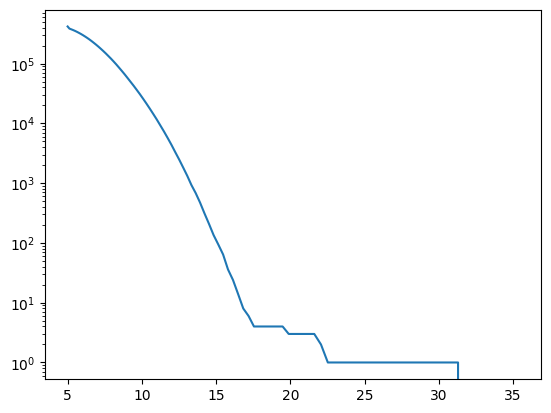

In [11]:
plt.semilogy(all_redshifts, nr_halo_arr)

In [12]:
from astropy.cosmology import Planck18 as cosmo
redshifts = []
nr_halo_arr = []

redshift = []
t_star_fit = []

for i in range(len(lc.cache_files['halobox'])-1):
    zi = lc.cache_files['halobox'][i][0]
    zf = lc.cache_files['halobox'][i+1][0]
    with h5py.File(lc.cache_files['halobox'][i][1]) as f:
        nion_i = f['HaloBox']['n_ion'][:]

    with h5py.File(lc.cache_files['halobox'][i+1][1]) as f:
        nion_f = f['HaloBox']['n_ion'][:]
    dt = cosmo.lookback_time(zi) - cosmo.lookback_time(zf)
    d = nion_f.sum()/(nion_f.sum()-nion_i.sum()) * (dt * cosmo.H(zf)).cgs.value
    #d =  nion_f.sum()/(nion_f.sum()-nion_i.sum()) * (dt / cosmo.H(zf)).cgs.value
    t_star_fit.append(d)
    redshifts.append(zi)
    #print(d)
    print(zi, zf, np.count_nonzero(nion_f-nion_i < 0), d)

redshifts = np.array(redshifts) #all_redshifts.copy()
t_star_fit = np.nan_to_num(np.array(t_star_fit), nan=0.0)

/tmp/ipykernel_27266/591306123.py:17: RuntimeWarning: invalid value encountered in scalar divide
  d = nion_f.sum()/(nion_f.sum()-nion_i.sum()) * (dt * cosmo.H(zf)).cgs.value


35.371912840518874 34.65873874574053 0 nan
34.65873874574053 33.95954844366764 0 nan
33.95954844366764 33.27406774254275 0 nan
33.27406774254275 32.60202782691232 0 nan
32.60202782691232 31.943165152209147 0 nan
31.943165152209147 31.297221341401723 0 0.019510581893479203
31.297221341401723 30.663943083670105 0 0.2671318826096479
30.663943083670105 30.043082035068537 0 0.2671445525757726
30.043082035068537 29.43439472113583 0 0.2677420304445522
29.43439472113583 28.83764244141539 0 0.26882480869650804
28.83764244141539 28.252591175847343 0 0.2703357471707727
28.252591175847343 27.679011492996153 0 0.27220384338143594
27.679011492996153 27.116678460077683 0 0.2744186226837684
27.116678460077683 26.565371554750413 0 0.27691338041908103
26.565371554750413 26.024874578636265 0 0.27971279011146444
26.024874578636265 25.49497557253708 0 0.28274253664934745
25.49497557253708 24.975466733313517 0 0.28606277685583187
24.975466733313517 24.466144332393796 0 0.28957426217294696
24.466144332393796

In [28]:
t_star_fit.mean() * 2

0.3121000339743076

In [40]:
i = 40
zi = lc.cache_files['halobox'][i][0]
print(zi, t_star_fit[i:].mean())

15.472503028519771 0.1428703612107331


In [16]:
t_star_fit.mean(), t_star_fit.max()

(0.1560500169871538, 0.3049222531264427)

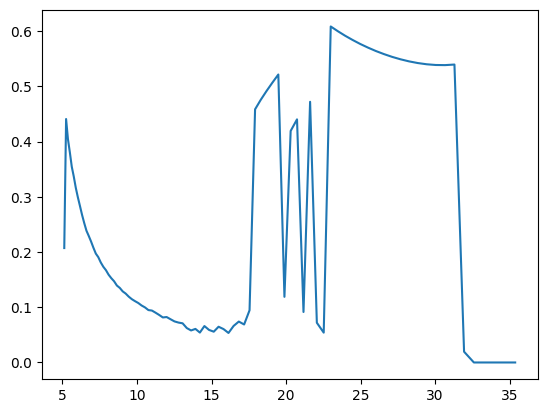

In [22]:
#plt.plot(redshifts, t_star_fit)
plt.plot(redshifts, t_star_fit)
#plt.plot(t_star_fit)

In [37]:
np.mean(t_star_fit/(1+redshifts))

0.012613924101098007

In [1]:
params['Output']

NameError: name 'params' is not defined

In [24]:
redshifts

array([31.29722134, 30.66394308, 30.04308204, 29.43439472, 28.83764244,
       28.25259118, 27.67901149, 27.11667846, 26.56537155, 26.02487458,
       25.49497557, 24.97546673, 24.46614433, 23.96680864, 23.47726383,
       22.99731793, 22.52678272, 22.06547369, 21.61320992, 21.16981406,
       20.73511223, 20.30893396, 19.89111211, 19.48148285, 19.07988552,
       18.68616264, 18.30015981, 17.92172566, 17.55071178, 17.18697267,
       16.8303657 , 16.48075101, 16.13799151, 15.80195277, 15.47250303,
       15.14951308, 14.83285625, 14.52240838, 14.21804772, 13.9196549 ,
       13.62711292, 13.34030706, 13.05912483, 12.78345597, 12.51319238,
       12.24822807, 11.98845914, 11.73378371, 11.48410191, 11.23931582,
       10.99932946, 10.76404871, 10.53338131, 10.30723679, 10.08552647,
        9.86816341,  9.65506236,  9.44613977,  9.24131369,  9.0405038 ,
        8.84363137,  8.65061917,  8.46139152,  8.27587421,  8.09399449,
        7.91568104,  7.74086393,  7.5694746 ,  7.40144584,  7.23

In [25]:
all_redshifts

array([35.37191284, 34.65873875, 33.95954844, 33.27406774, 32.60202783,
       31.94316515, 31.29722134, 30.66394308, 30.04308204, 29.43439472,
       28.83764244, 28.25259118, 27.67901149, 27.11667846, 26.56537155,
       26.02487458, 25.49497557, 24.97546673, 24.46614433, 23.96680864,
       23.47726383, 22.99731793, 22.52678272, 22.06547369, 21.61320992,
       21.16981406, 20.73511223, 20.30893396, 19.89111211, 19.48148285,
       19.07988552, 18.68616264, 18.30015981, 17.92172566, 17.55071178,
       17.18697267, 16.8303657 , 16.48075101, 16.13799151, 15.80195277,
       15.47250303, 15.14951308, 14.83285625, 14.52240838, 14.21804772,
       13.9196549 , 13.62711292, 13.34030706, 13.05912483, 12.78345597,
       12.51319238, 12.24822807, 11.98845914, 11.73378371, 11.48410191,
       11.23931582, 10.99932946, 10.76404871, 10.53338131, 10.30723679,
       10.08552647,  9.86816341,  9.65506236,  9.44613977,  9.24131369,
        9.0405038 ,  8.84363137,  8.65061917,  8.46139152,  8.27